# Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Dataset

In [2]:
"""
from sklearn.datasets import fetch_california_housing

df_ = fetch_california_housing()

# Creating dataframe
df = pd.DataFrame(df_.data,
                columns=df_.feature_names)
df[df_.target_names[0]] = pd.Series(df_.target)
df.head()
"""

'\nfrom sklearn.datasets import fetch_california_housing\n\ndf_ = fetch_california_housing()\n\n# Creating dataframe\ndf = pd.DataFrame(df_.data,\n                columns=df_.feature_names)\ndf[df_.target_names[0]] = pd.Series(df_.target)\ndf.head()\n'

In [3]:
df = pd.read_csv("housing.csv")#.drop(columns='ocean_proximity')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
## check nulls of data 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* > The Dataset a contains 20640 instances and only 207 null values in total bedrooms feature
* > Every features are continuous of type float64, but ocean_proximity is a category 


# Exploratory Data Analysis


In [ ]:
# set up some Seaborn params to standardize plots

sns.set_style('darkgrid')

PALETTE = "Set2"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
# Explore the column ocean_proximity
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_7144\2318623998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


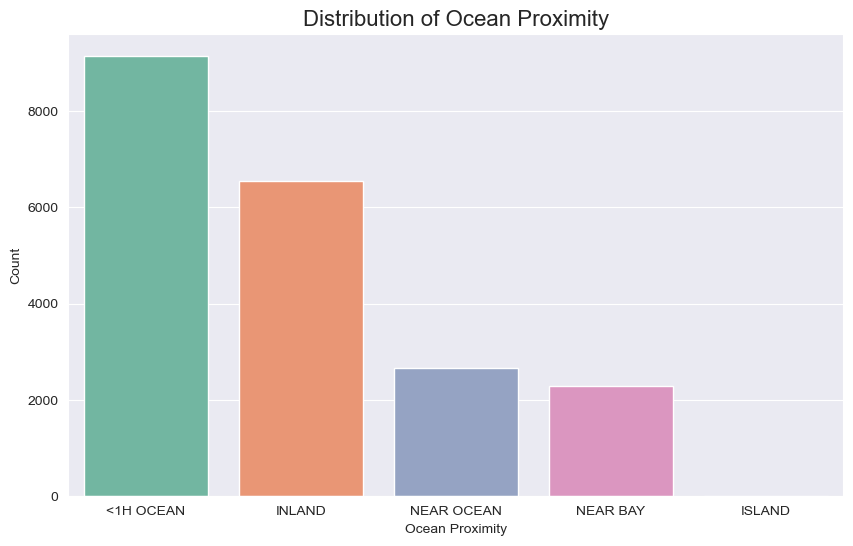

In [ ]:
plt.figure(figsize=(10, 6))

# Countplot
ax = sns.barplot(
    x=ocean_values.index, 
    y=ocean_values.values, 
    order=ocean_values.index,
    palette=PALETTE
)
'''
# Annotate the percentage for each bar
for i, count in enumerate(ocean_values):
    percentage = '{:0.2f}%'.format(100 * count / df.shape[0])
    ax.text(i, 
            count + 100, 
            percentage, 
            ha='center',  
            fontsize=12
            )
'''
ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ocean Proximity', fontsize=16)

plt.show()

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


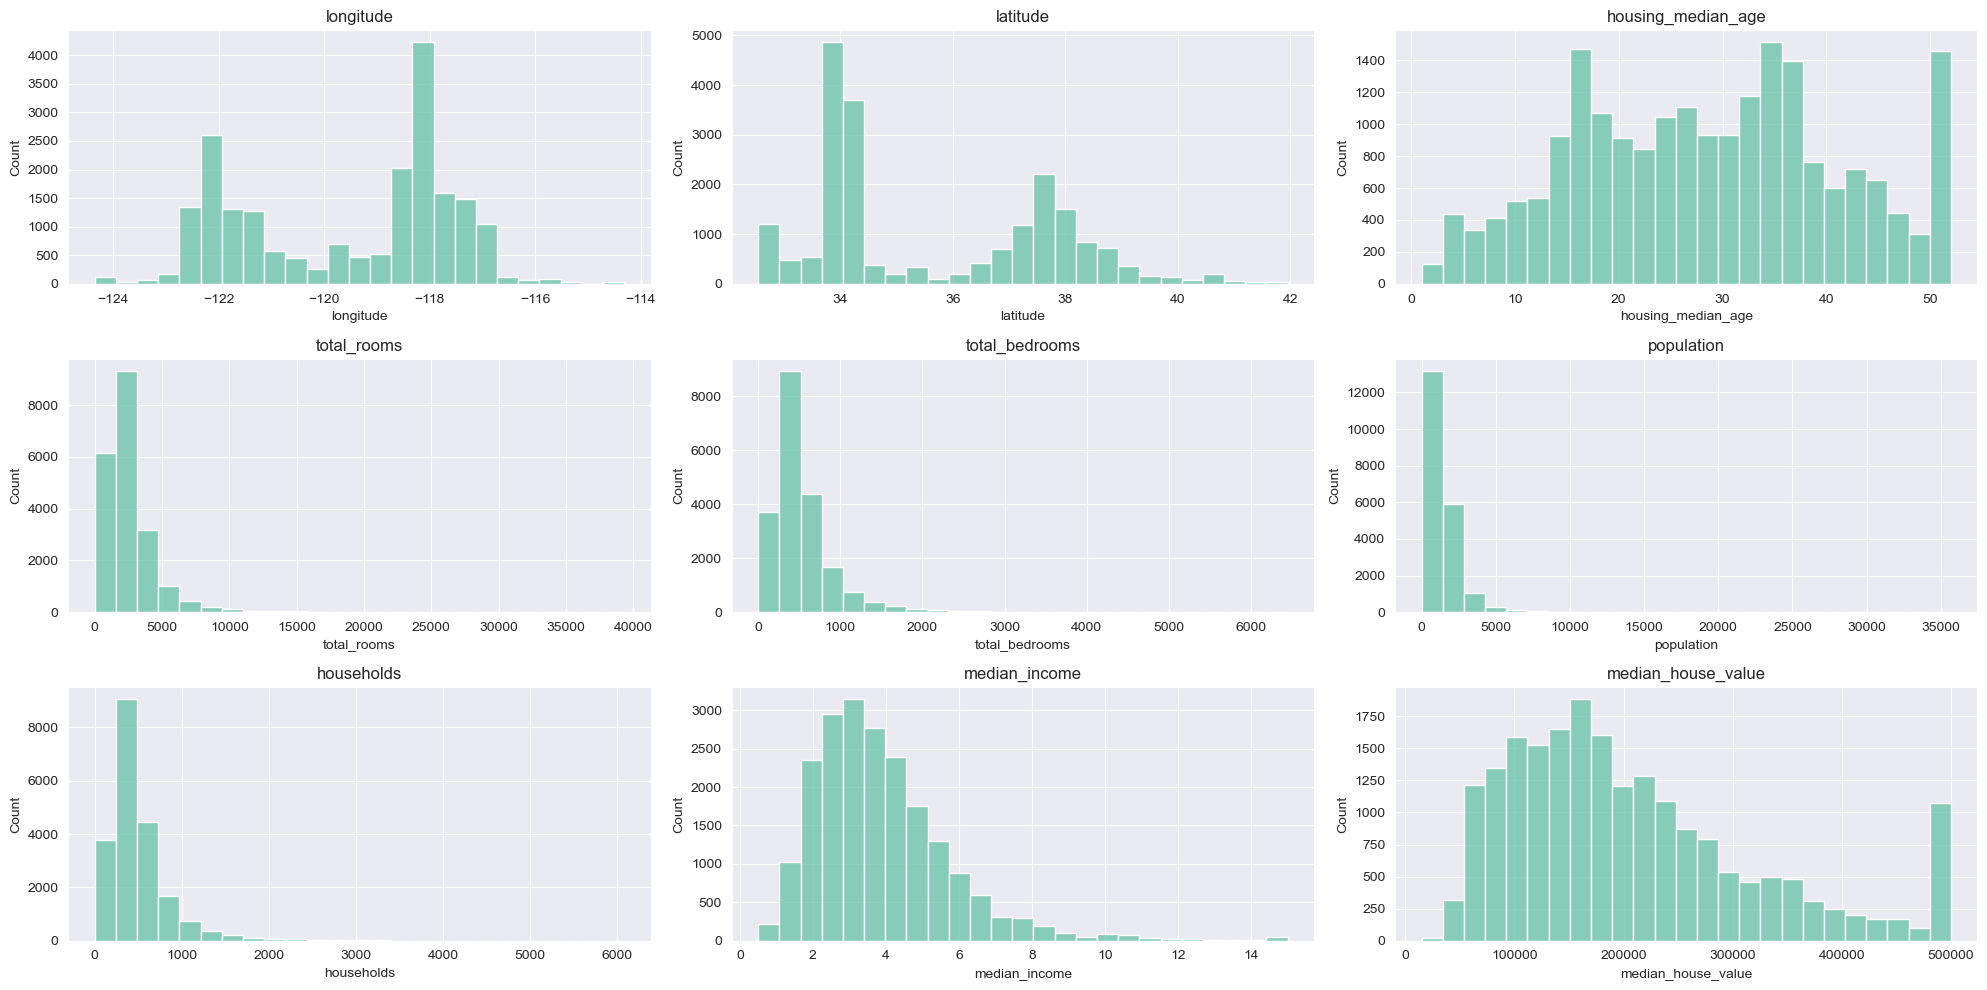

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

columns = df.drop(columns='ocean_proximity').columns

for i, column in enumerate(columns):
    sns.histplot(data=df, 
                 x=column, 
                 bins=25, 
                 ax=axes[i], 
                 kde=False
                 )
    
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

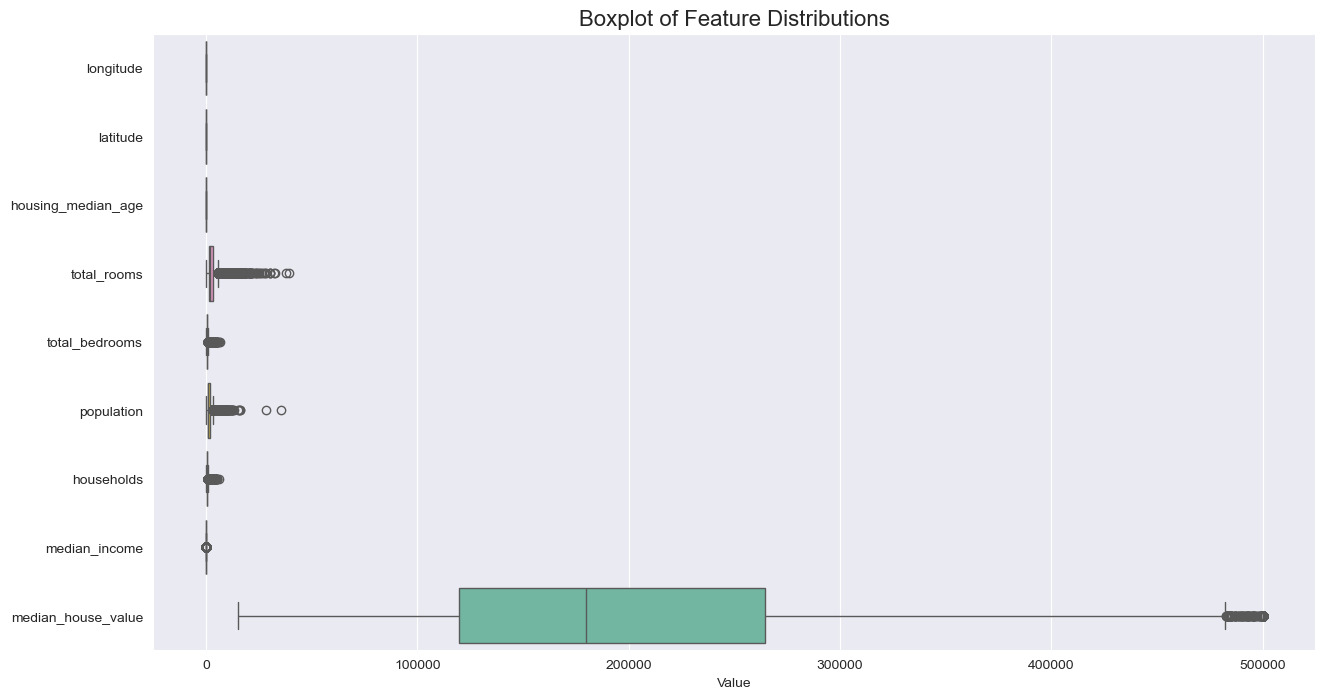

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[columns], orient="h", palette=PALETTE) 
plt.title("Boxplot of Feature Distributions", fontsize=16)
plt.xlabel("Value")
plt.show()

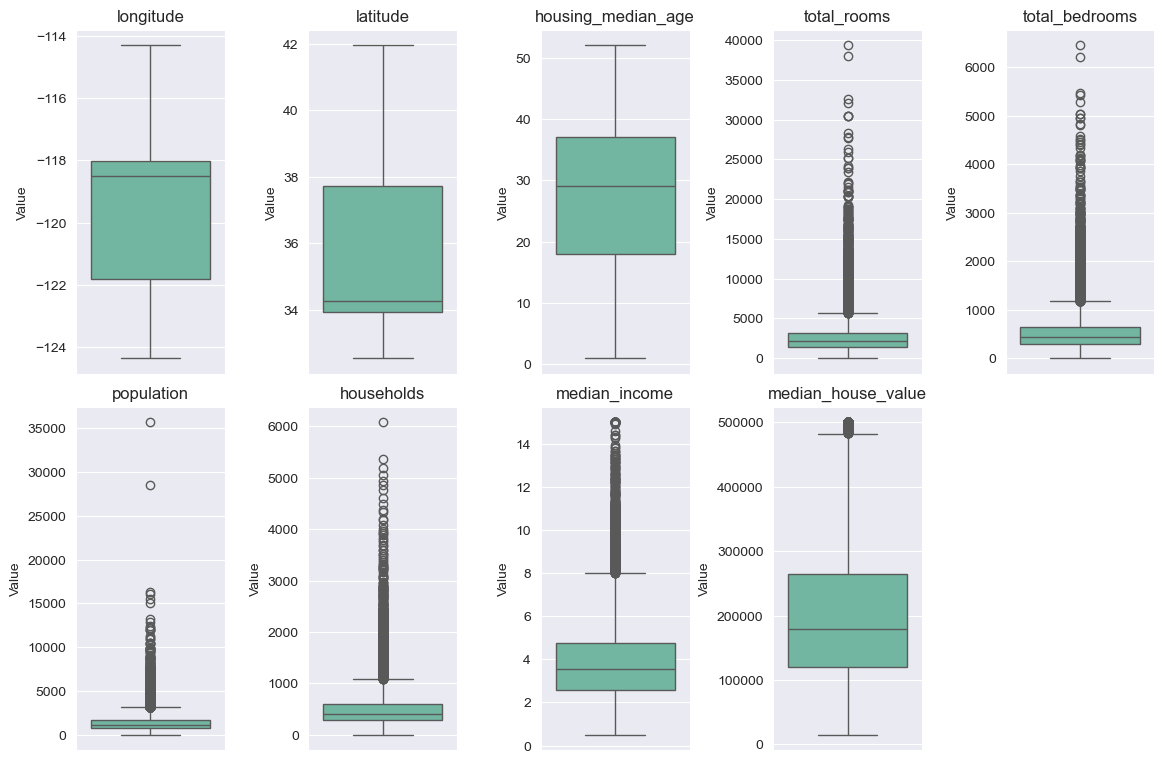

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, 
                y=column, 
                ax=axes[i],
                showfliers = True
                )
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=0.9)
plt.show()

* > Why do we have so many outliers in some columns ? Instead of removing them, we can try to investigate
* > Quid de l'aggregation des donnees

### Investigate some outliers

In [ ]:
# Population : Plot the outliers in the map
# Total rooms + bedrooms, are they the same outliers as population column ?

### Cut Median income columns

In [ ]:
## Make median_income into bins
income_bins = pd.cut(df["median_income"],
                     bins=[0, 1.5, 3, 4.5, 6, np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

<Axes: xlabel='median_income', ylabel='count'>

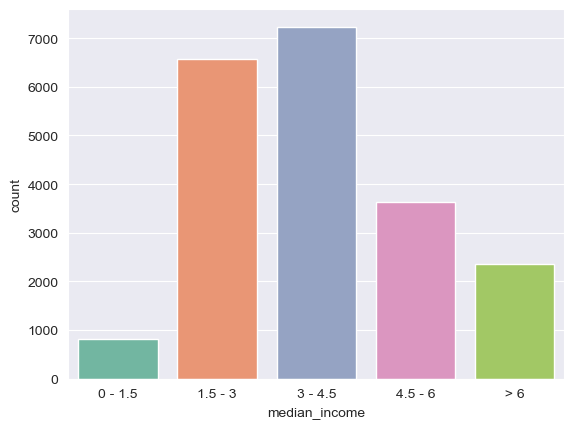

In [ ]:
sns.countplot(x = income_bins, 
              palette=PALETTE,x
              hue = income_bins
              )

# Bivariate visualization


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: xlabel='median_income', ylabel='median_house_value'>

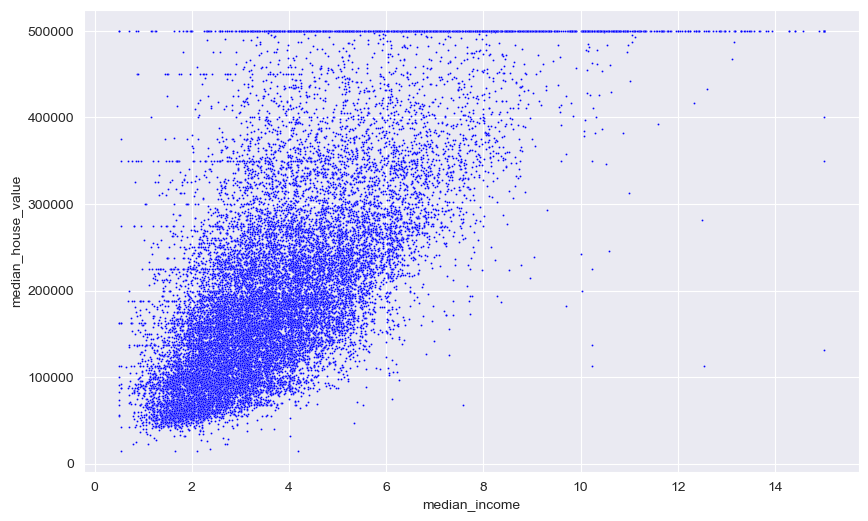

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="median_income",
    y="median_house_value",
    #alpha=0.1, #control transparency
    )
#plt.xlim([0, 10]) 
#plt.show()


## Lets deal with latitude and longitude

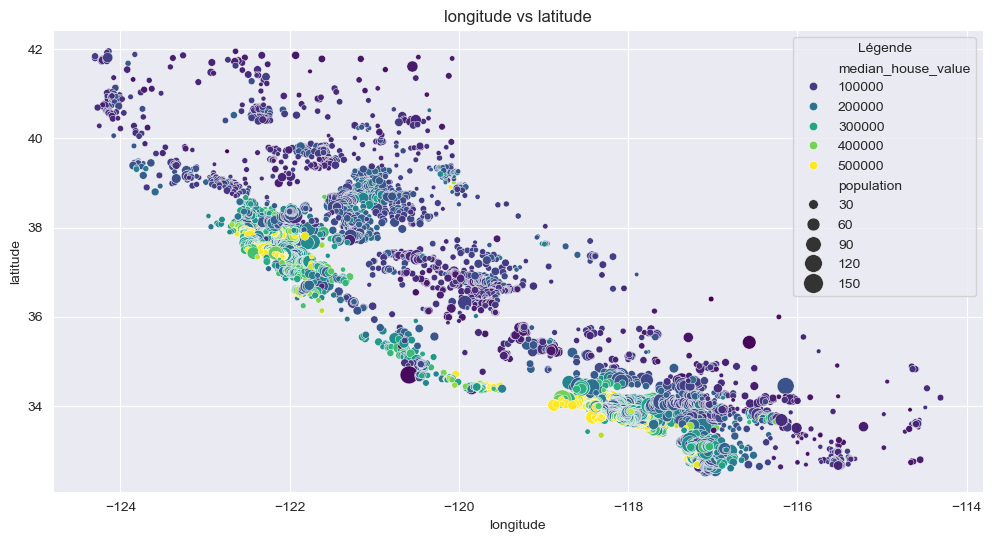

In [ ]:
plt.figure(figsize=(12,6))
sc = sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    palette="viridis",
    hue = "median_house_value",
    size = df["population"]/100,
    sizes = (10, 200)
)

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend(title="Légende")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7144\2125344957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='ocean_proximity',


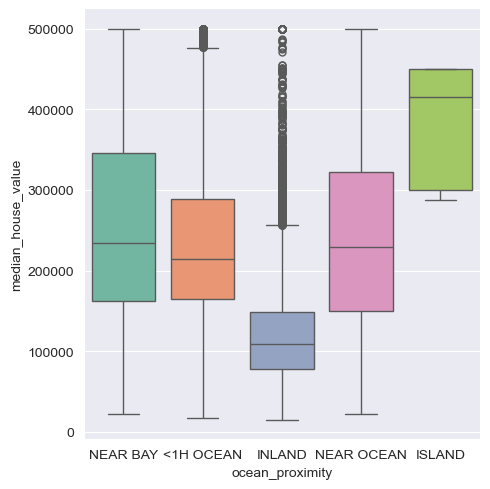

In [ ]:
# Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity',
            y="median_house_value",
            kind='box',
            data=df,
            palette=PALETTE
            )

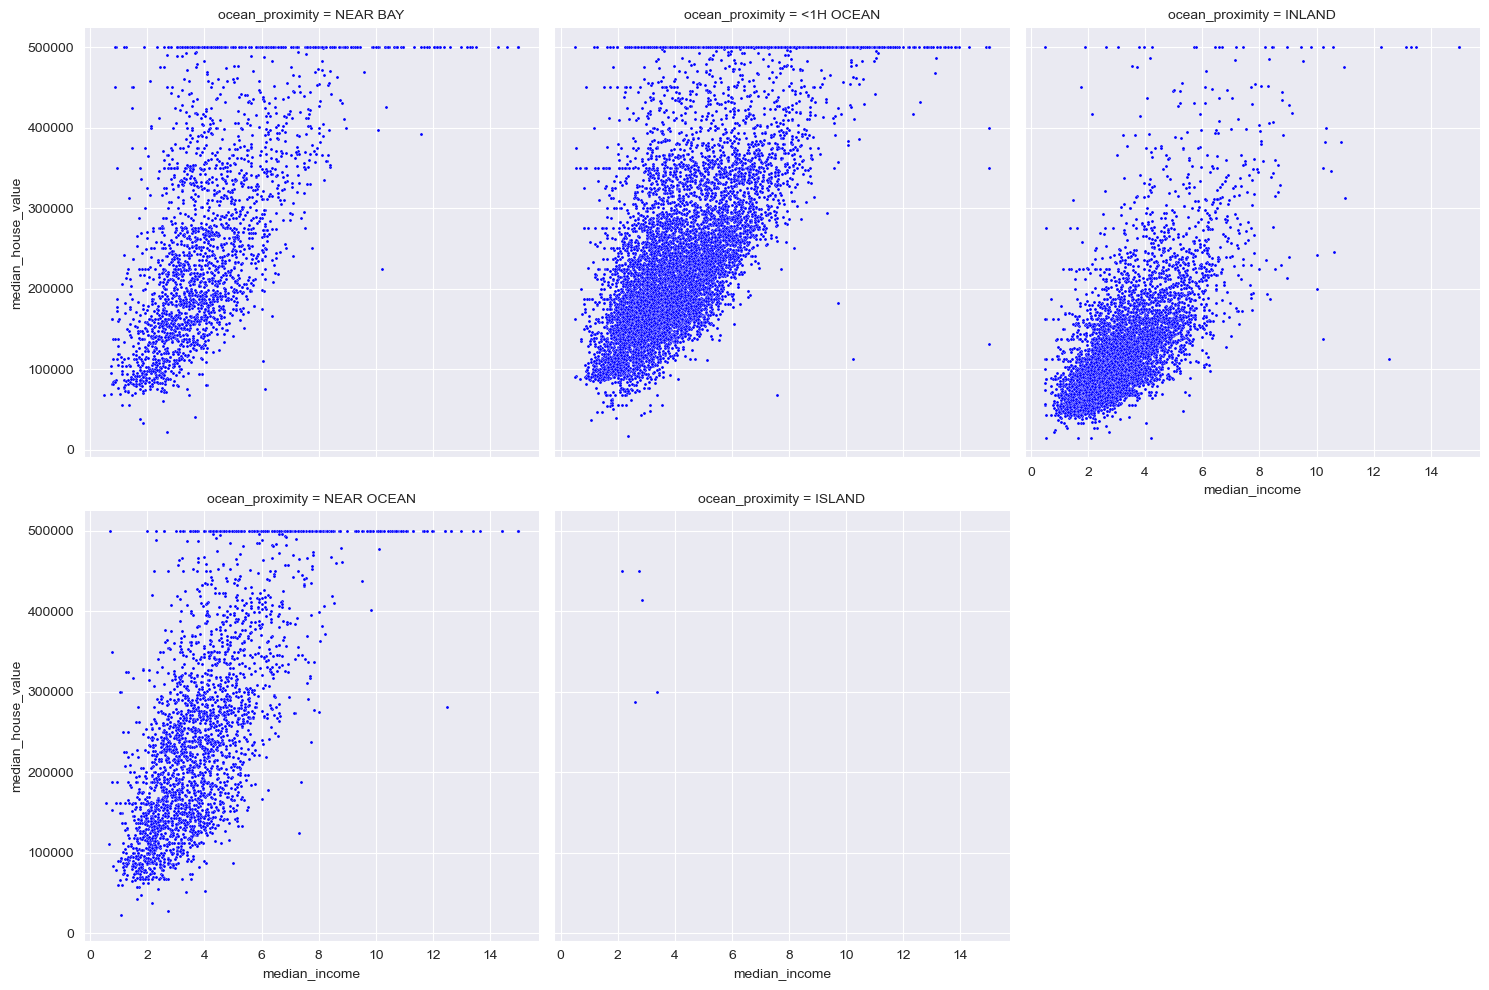

In [ ]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",
            y='median_house_value',
            data=df,
            col="ocean_proximity",
            col_wrap=3,
            s=5,
            color = 'blue')

* > It seems that the impact of median_income on median_house_value is almost the same at ocean_proximity categories

## Impact of housing median age

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

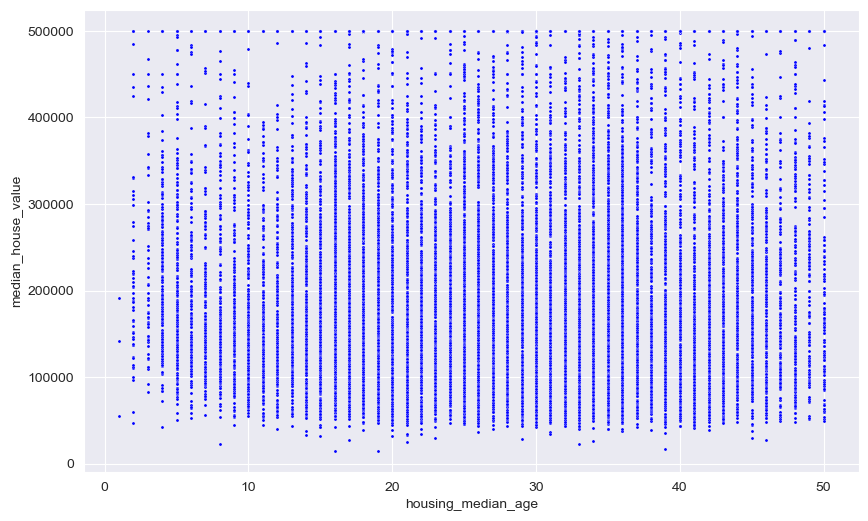

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='housing_median_age',
                y='median_house_value',
                data=df,
                color = 'blue',
                s = 5
                )

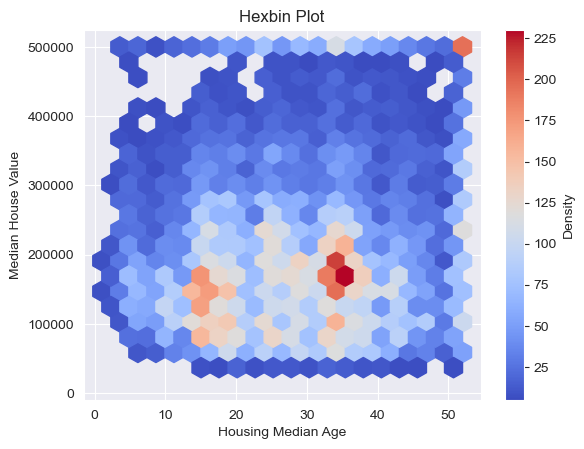

In [ ]:
plt.hexbin(
    x=df["housing_median_age"],
    y=df["median_house_value"],
    gridsize=20, 
    mincnt=5,
    cmap = 'coolwarm'
)
plt.colorbar(label="Density")
plt.title("Hexbin Plot")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.show()

In [ ]:
df["age_bins"] = pd.cut(df["housing_median_age"], 
                        bins=[0, 10, 20, 30, 40, 50], 
                        labels=["0-10", 
                                "10-20", 
                                "20-30", 
                                "30-40",
                                "40-50"]
                                )

C:\Users\Admin\AppData\Local\Temp\ipykernel_7144\3958359270.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


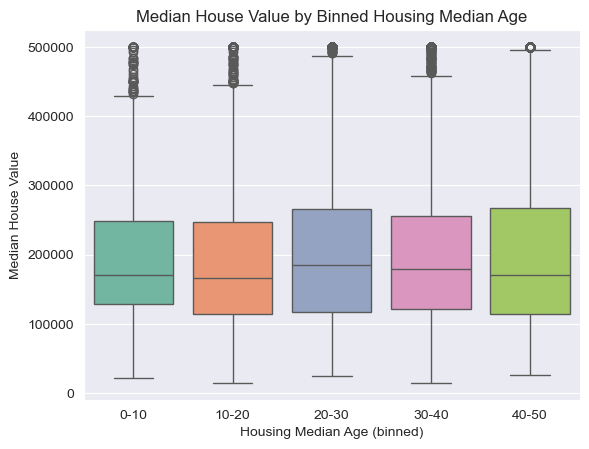

In [ ]:
sns.boxplot(
    data=df,
    x="age_bins",
    y="median_house_value",
    palette=PALETTE
)
plt.title("Median House Value by Binned Housing Median Age")
plt.xlabel("Housing Median Age (binned)")
plt.ylabel("Median House Value")
plt.show()

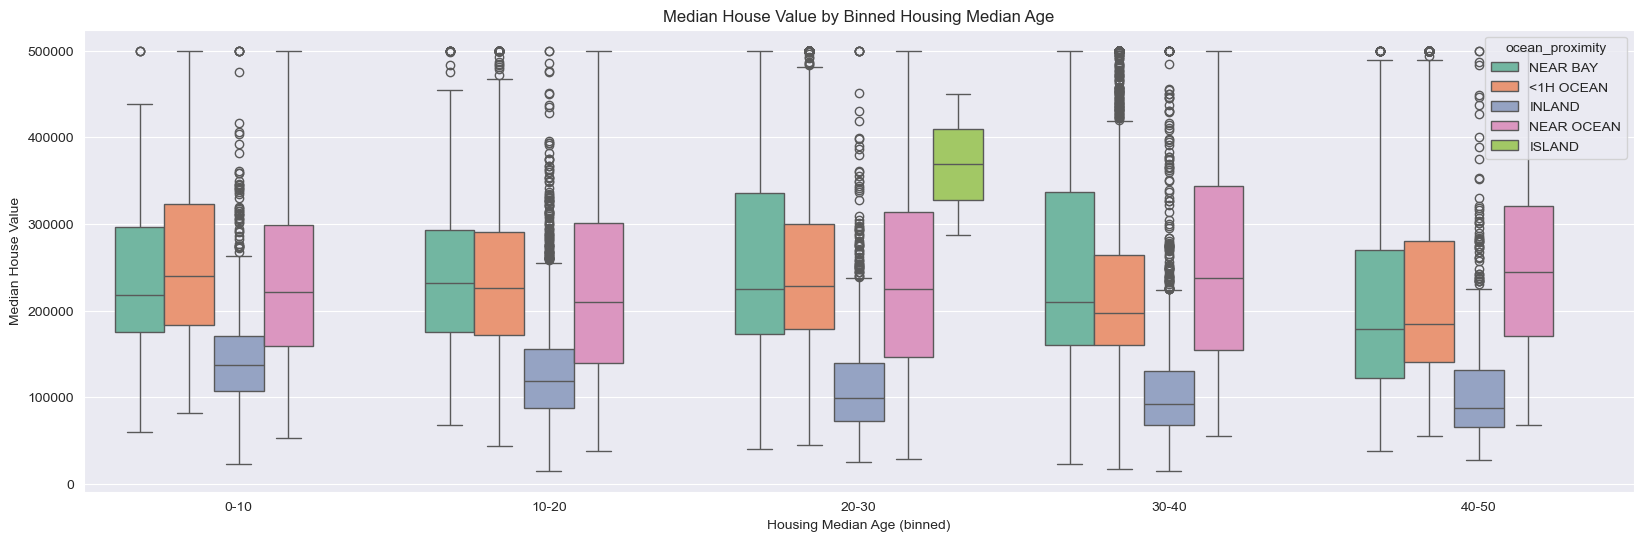

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(
    data=df,
    x="age_bins",
    y="median_house_value",
    palette=PALETTE,
    hue = 'ocean_proximity'
)
plt.title("Median House Value by Binned Housing Median Age")
plt.xlabel("Housing Median Age (binned)")
plt.ylabel("Median House Value")
plt.show()

* > no interaction between ocean proximity and housing median age (or very slight)
* > could there have interactions with old haussmanien buildings maybe
* > what about old fishing buildings ? (is there some in california ?) The old houses near bay have a lower value compared to most recent houses.

In [ ]:
df["population_bins"] = pd.cut(df["population"], 
                        bins=[0, 1000, 2000, 3000, 4000, np.inf], 
                        labels=["0-1000", 
                                "1000-2000", 
                                "2000-3000", 
                                "3000-4000",
                                ">4000"]
                                )
"""
df["population_bins"] = pd.cut(df["population"], 
                        bins=[0, 6000, 12000, 18000, 24000, np.inf], 
                        labels=["0-6000", 
                                "6000-12000", 
                                "12000-18000", 
                                "18000-24000",
                                ">24000"]
                                )"""

'\ndf["population_bins"] = pd.cut(df["population"], \n                        bins=[0, 6000, 12000, 18000, 24000, np.inf], \n                        labels=["0-6000", \n                                "6000-12000", \n                                "12000-18000", \n                                "18000-24000",\n                                ">24000"]\n                                )'

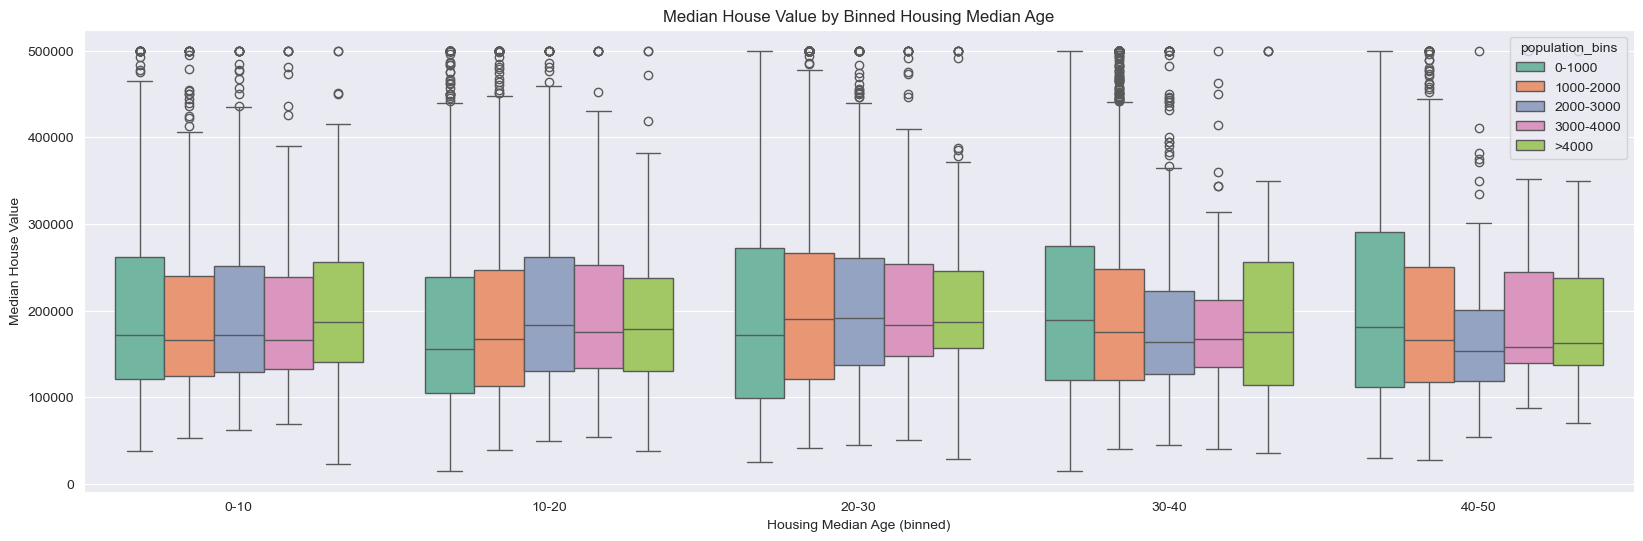

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(
    data=df,
    x="age_bins",
    y="median_house_value",
    palette=PALETTE,
    hue = 'population_bins'
)
plt.title("Median House Value by Binned Housing Median Age")
plt.xlabel("Housing Median Age (binned)")
plt.ylabel("Median House Value")
plt.show()

* > It seems that prices is higher near the ocean than the zones and these areas have higher population.

## Feature engineering

### Some ideas

Location : 
- With `longitude` and `latitude`, we could calculate the distance of each bloc to the city center of their cities, or other locations of interest

Housing features : 
- convert column to average per population
    - from `total_bedrooms` \& `households` -> `average_bedrooms_per_household`
    - from `total_rooms` \& `households` -> `average_rooms_per_household`
    - from `total_bedrooms` \& `total_rooms` -> `bedrooms_per_rooms`

Population density :
-  Dividing `population` by `households` -> `population_per_household`

Economic features : 
- Dividing `median_income` by `population_per_household` -> `income_per_capita`

In [ ]:
# Create new features

# Housing features
df['average_bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['average_rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']

# Population density
df['population_per_household'] = df['population'] / df['households']

# Economic features
df['income_per_capita'] = df['median_income'] / df['population_per_household']

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'age_bins', 'population_bins',
       'ocean_proximity_label_encoded', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'average_bedrooms_per_household', 'average_rooms_per_household',
       'bedrooms_per_rooms', 'population_per_household', 'income_per_capita'],
      dtype='object')

(0.0, 5000.0)

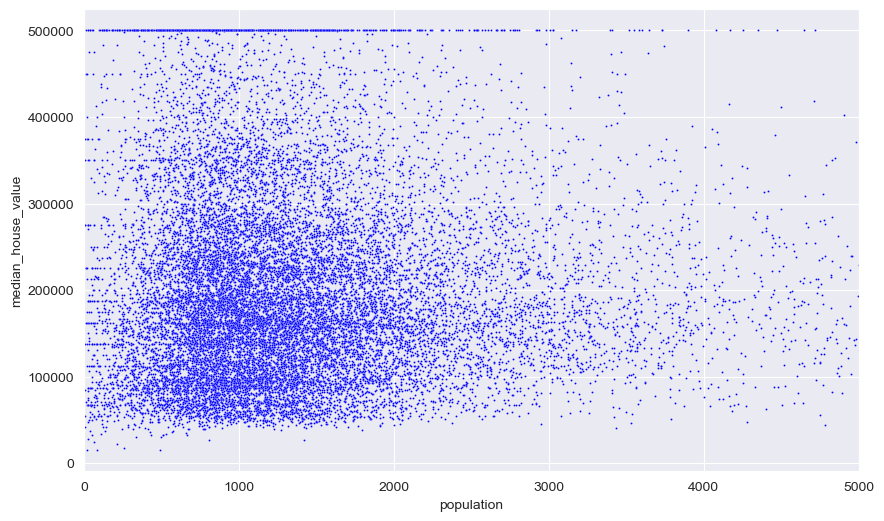

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="population",
    y="median_house_value",
    #alpha=0.1, #control transparency
    s = 2,
    color = 'blue'
)
plt.xlim([0, 5000]) 
#plt.show()

(0.0, 10.0)

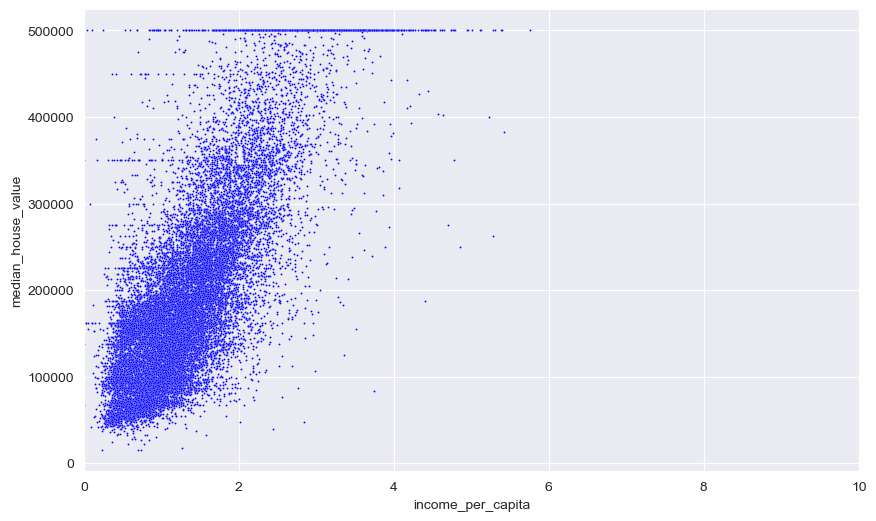

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="income_per_capita",
    y="median_house_value",
    #alpha=0.1, #control transparency
    s = 2,
    color = 'blue'
)
plt.xlim([0, 10]) 
#plt.ylim([0, 20])
#plt.show()

# Data preprocessing


- drop outliers 
- scale
- split
- train for 4 models
- analyse the different results

## Data cleaning


In [ ]:
# Fill the null values in total bedrooms column by mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# could also replace with KNN

In [ ]:
# delete outliers ?

df = df[df["total_bedrooms"]<=5000]
df = df[df["households"]<=4400]
df = df[df["median_income"]<=12]

## Encoding ocean proximity

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
mapping = {
    'INLAND' : 0,
    '<1H OCEAN' : 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND': 4
}

df['ocean_proximity_label_encoded'] = df['ocean_proximity'].map(mapping)

In [ ]:
ohe = OneHotEncoder(sparse_output = False)
df_ohe = ohe.fit_transform(df[['ocean_proximity']])

df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())



In [ ]:
df = pd.concat([df, df_ohe], axis=1)

df.dropna(inplace=True)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,average_bedrooms_per_household,average_rooms_per_household,bedrooms_per_rooms,population_per_household,income_per_capita,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,1.023810,6.984127,0.146591,2.555556,3.257687,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.971880,6.238137,0.155797,2.109842,3.934608,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,...,1.117647,4.294118,0.260274,2.026891,1.026400,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,...,1.071970,4.242424,0.252679,2.640152,0.804878,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,...,1.085919,5.343675,0.203216,2.362768,0.842698,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19089,-122.61,38.24,25.0,2990.0,450.0,1335.0,434.0,4.7000,190100.0,<1H OCEAN,...,1.036866,6.889401,0.150502,3.076037,1.527940,0.0,1.0,0.0,0.0,0.0
19090,-122.61,38.24,17.0,1728.0,271.0,897.0,284.0,3.4896,185900.0,<1H OCEAN,...,0.954225,6.084507,0.156829,3.158451,1.104845,0.0,1.0,0.0,0.0,0.0
19091,-122.61,38.23,18.0,2042.0,420.0,914.0,400.0,2.9871,193800.0,<1H OCEAN,...,1.050000,5.105000,0.205681,2.285000,1.307265,0.0,1.0,0.0,0.0,0.0
19092,-122.62,38.24,19.0,1687.0,253.0,893.0,257.0,6.2040,201800.0,<1H OCEAN,...,0.984436,6.564202,0.149970,3.474708,1.785474,0.0,1.0,0.0,0.0,0.0


## Split and scaling function

In [ ]:
df.dtypes

longitude                         float64
latitude                          float64
housing_median_age                float64
total_rooms                       float64
total_bedrooms                    float64
population                        float64
households                        float64
median_income                     float64
median_house_value                float64
ocean_proximity                    object
age_bins                         category
population_bins                  category
ocean_proximity_label_encoded     float64
ocean_proximity_<1H OCEAN         float64
ocean_proximity_INLAND            float64
ocean_proximity_ISLAND            float64
ocean_proximity_NEAR BAY          float64
ocean_proximity_NEAR OCEAN        float64
dtype: object

In [ ]:
def split_and_scale(df, 
                    target_column,
                    TEST_SIZE=0.2,
                    RANDOM_STATE=18,
                    scaler='min_max'
                    ):

    # Split the data into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE
                                                        )

    # Select numerical features to scale
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Scale the numerical data
    if scaler == 'min_max':
        scaler = MinMaxScaler()
        X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
        
    elif scaler == 'robust':
        scaler = RobustScaler()
        X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    else:
        print('Data not scaled')


    return X_train, X_test, y_train, y_test


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_bins,population_bins,ocean_proximity_label_encoded,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,40-50,0-1000,3.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,20-30,2000-3000,3.0,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,40-50,1000-2000,3.0,0.0,0.0,0.0,1.0,0.0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,40-50,0-1000,3.0,0.0,0.0,0.0,1.0,0.0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,40-50,0-1000,3.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND,30-40,0-1000,0.0,0.0,1.0,0.0,0.0,0.0
20513,-121.63,38.67,34.0,431.0,85.0,391.0,77.0,2.6250,225000.0,INLAND,30-40,0-1000,0.0,0.0,1.0,0.0,0.0,0.0
20514,-121.52,38.58,24.0,938.0,275.0,508.0,253.0,1.6420,32500.0,INLAND,20-30,0-1000,0.0,0.0,1.0,0.0,0.0,0.0
20515,-121.53,38.56,39.0,2438.0,483.0,1103.0,472.0,2.9375,86600.0,INLAND,30-40,1000-2000,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = split_and_scale(df, 'median_house_value', 
                                                   scaler='min_max',
                                                   )


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,age_bins,...,average_bedrooms_per_household,average_rooms_per_household,bedrooms_per_rooms,population_per_household,income_per_capita,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
364,-122.14,37.75,33.0,1334.0,200.0,579.0,202.0,6.8323,NEAR BAY,30-40,...,0.990099,6.603960,0.149925,2.866337,2.383635,0.0,0.0,0.0,1.0,0.0
17978,-121.97,37.30,25.0,5463.0,1351.0,2758.0,1310.0,3.0079,<1H OCEAN,20-30,...,1.031298,4.170229,0.247300,2.105344,1.428698,0.0,1.0,0.0,0.0,0.0
7862,-118.13,33.90,35.0,1458.0,261.0,686.0,236.0,3.9038,<1H OCEAN,30-40,...,1.105932,6.177966,0.179012,2.906780,1.342998,1.0,0.0,0.0,0.0,0.0
12482,-121.50,38.58,20.0,4018.0,1220.0,1570.0,1122.0,2.5821,INLAND,10-20,...,1.087344,3.581105,0.303634,1.399287,1.845297,0.0,1.0,0.0,0.0,0.0
14870,-117.11,32.64,23.0,1619.0,447.0,1025.0,415.0,1.8580,NEAR OCEAN,20-30,...,1.077108,3.901205,0.276096,2.469880,0.752263,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,-124.14,40.67,23.0,580.0,117.0,320.0,109.0,4.2054,NEAR OCEAN,20-30,...,1.073394,5.321101,0.201724,2.935780,1.432464,0.0,1.0,0.0,0.0,0.0
5866,-118.35,34.19,45.0,903.0,190.0,557.0,204.0,4.0313,<1H OCEAN,40-50,...,0.931373,4.426471,0.210410,2.730392,1.476455,0.0,1.0,0.0,0.0,0.0
17641,-121.90,37.25,28.0,2714.0,502.0,1389.0,490.0,5.7385,<1H OCEAN,20-30,...,1.024490,5.538776,0.184967,2.834694,2.024381,0.0,1.0,0.0,0.0,0.0
2019,-119.79,36.70,23.0,1731.0,363.0,1210.0,341.0,1.3922,INLAND,20-30,...,1.064516,5.076246,0.209705,3.548387,0.392347,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.head()

# Predictions


In [ ]:
columns = ['average_bedrooms_per_household',
       'average_rooms_per_household', 'bedrooms_per_rooms',
       'population_per_household', 'income_per_capita', 
       'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'
       ]

X_train_1 = X_train[columns]
X_test_1 = X_test[columns]

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    print(f"__________ {name} __________")
    model.fit(X_train_1, y_train)
    predictions = model.predict(X_test_1)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error: {mse:.4f}\n")

__________ Linear Regression __________
Mean Squared Error: {mse:.4f}

__________ Decision Tree __________
Mean Squared Error: {mse:.4f}

__________ Random Forest __________
Mean Squared Error: {mse:.4f}

__________ Support Vector Regressor __________
Mean Squared Error: {mse:.4f}

__________ K-Neighbors Regressor __________
Mean Squared Error: {mse:.4f}



In [ ]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_1, y_train)

predictions = random_forest.predict(X_test_1)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

Mean Squared Error (MSE): 3865372158.6937
Root Mean Squared Error (RMSE): 62172.1172


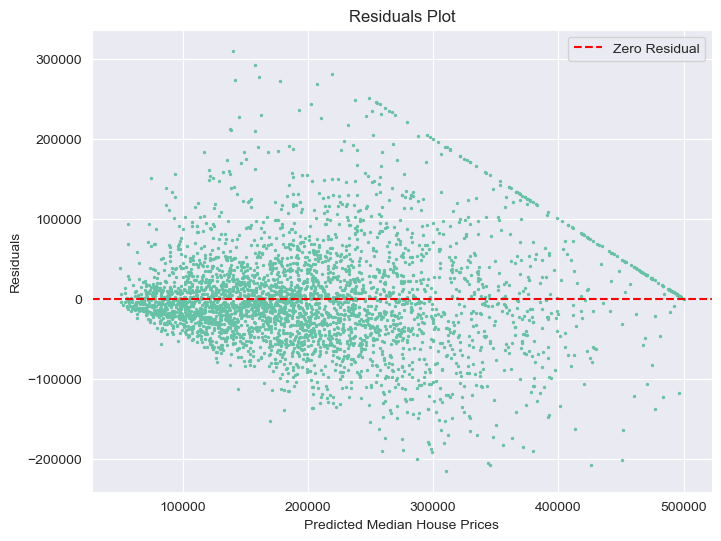

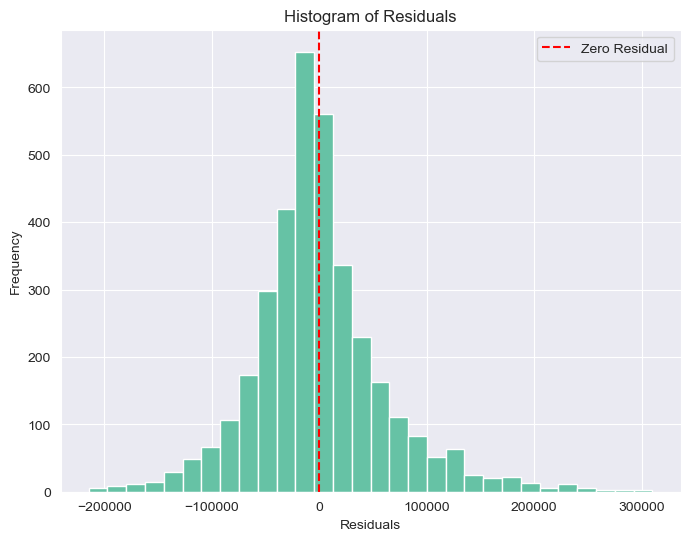

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Mean Squared Error (MSE): 12663374947.9974
Root Mean Squared Error (RMSE): 112531.6620


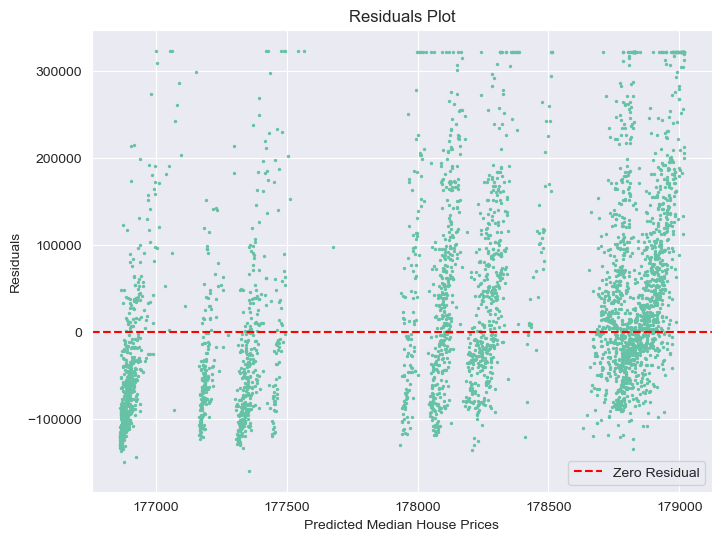

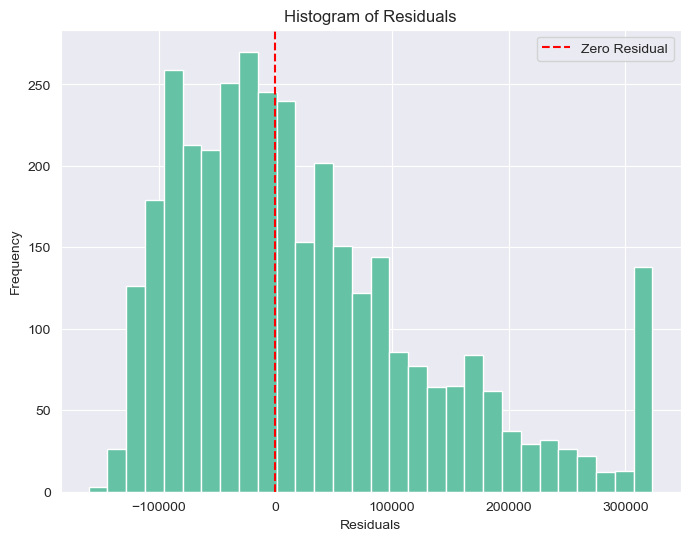

In [ ]:
SVR_reg = SVR()
SVR_reg.fit(X_train_1, y_train)

predictions = SVR_reg.predict(X_test_1)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Mean Squared Error (MSE): 11843101319.6309
Root Mean Squared Error (RMSE): 108826.0140


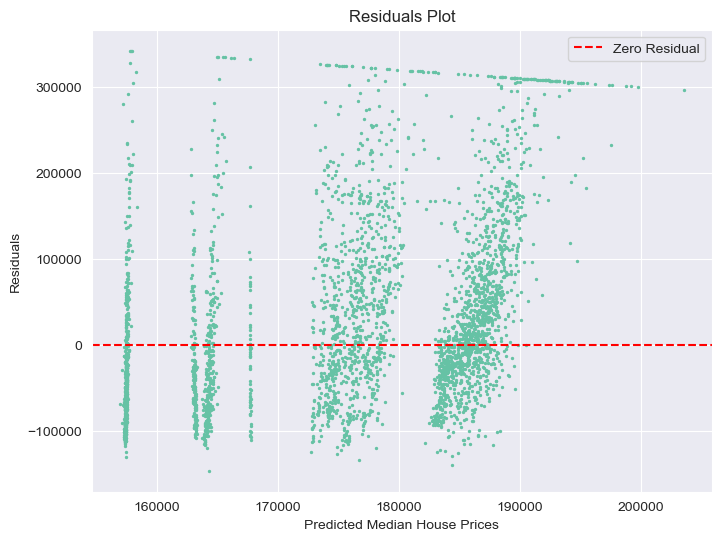

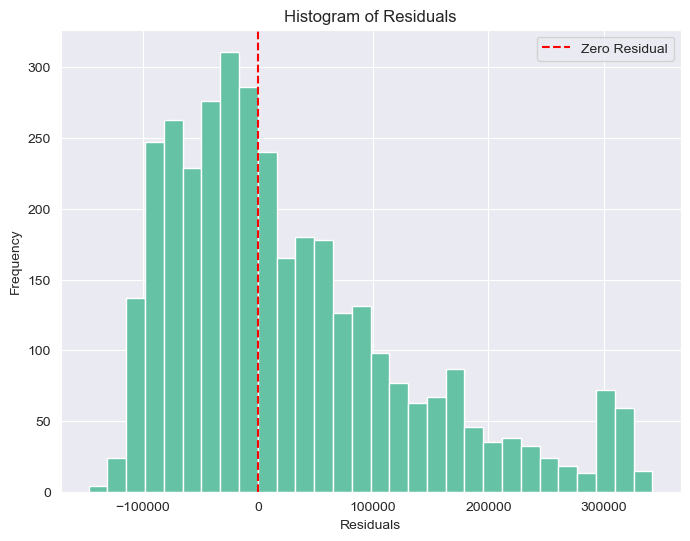

In [ ]:
SVR_reg = SVR(C = 10, 
              kernel = 'poly')
SVR_reg.fit(X_train_1, y_train)

predictions = SVR_reg.predict(X_test_1)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

residuals = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()